In [45]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack

In [46]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder


In [47]:
from pre_processamento import pre_processamento, text_preprocess

In [48]:
from lightgbm import LGBMRegressor

In [93]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

In [50]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [51]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [52]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1481661 non-null  object 
 1   item_condition_id  1481661 non-null  int64  
 2   brand_name         849325 non-null   object 
 3   price              1481661 non-null  float64
 4   shipping           1481661 non-null  int64  
 5   item_description   1481657 non-null  object 
 6   stock              1481661 non-null  int32  
 7   gen_cat            1481661 non-null  object 
 8   sub1_cat           1481661 non-null  object 
 9   sub2_cat           1481661 non-null  object 
 10  datetime_month     1474770 non-null  float64
 11  datetime_year      1474770 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 141.3+ MB


In [54]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [55]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [56]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [57]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

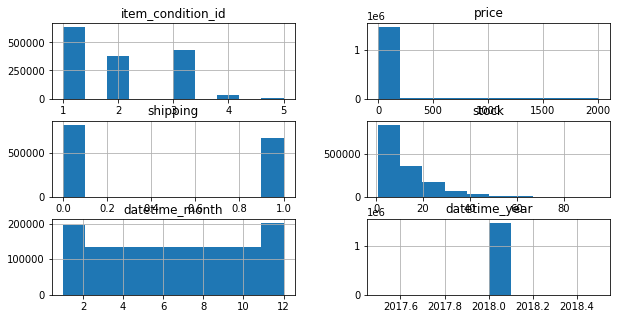

In [58]:
train.hist(figsize=(10,5))

In [59]:
X = train.drop("price", axis = 1)
y = train["price"]

#   Split

In [60]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

<AxesSubplot:>

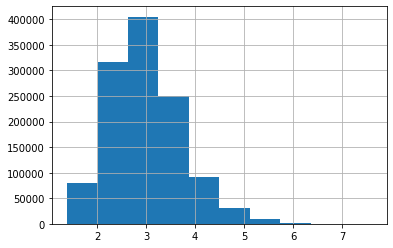

In [61]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

In [62]:
Xtrain.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
760902,VICTORIAS SECRET Bra,3,Victoria's Secret,0,VS 32A nude VS Push up Bombshell Plunge Good c...,3,Women,Underwear,Bras,12.0,2018.0
1241133,"4 Scott Westerfeld Uglies, Pretty, Extra",3,NaN,1,This is a lot of 4 Scott Westerfeld books. 3 P...,16,Vintage & Collectibles,Book,Fiction,11.0,2018.0
473273,Kylie Jenner Lipstick,1,NaN,1,Heir... never used!!! Metal matte,2,Beauty,Makeup,Lips,10.0,2018.0
495608,Suave Men Body Wash,1,Suave,0,This listing is for 3!!! (Not 5 as pictured). ...,10,Other,Daily & Travel items,Personal Care,11.0,2018.0
107994,New Men's Dr. martens 10 12,1,NaN,0,Men's 10 or women's 12,13,Men,Shoes,Boots,10.0,2018.0


In [63]:
Xval.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
20170,Swiss Army knife,1,NaN,1,New in original box. Never used.,13,Sports & Outdoors,Outdoors,Hiking & Camping,4.0,2018.0
155565,Dove Soap Mega LOT Assorted,1,Dove,0,(9) 4ct (36 bars total) Dove Soap (5) Febreze ...,1,Other,Daily & Travel items,Personal Care,6.0,2018.0
142735,"LOWEST PRICE, HIGHEST QUALITY BLENDER",1,NaN,1,STOP THROWING YOUR MAKEUP AWAY ! ! * ~ * Newes...,7,Beauty,Tools & Accessories,Makeup Brushes & Tools,1.0,2018.0
709876,Gold aluminum fidget spinner,1,NaN,1,Aluminum fidget spinner: Brand new . Comes in ...,13,Kids,Toys,Games,5.0,2018.0
723286,Duffle bag,3,NaN,0,Used duffle bag Perfect for young girls for tr...,43,Women,Women's Handbags,Totes & Shoppers,2.0,2018.0


In [64]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_features=50000) #vetorização, com stop word. 

In [65]:
ohe = OneHotEncoder(handle_unknown="ignore") 

#   Pré-processamento treino

In [66]:
Xtrain["name"] = Xtrain["name"].apply(lambda x: text_preprocess(x))

In [67]:
Xtrain["item_description"] = Xtrain["item_description"].astype(str)

In [68]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))

In [69]:
Xtrain

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
760902,victorias secret bra,3,Victoria's Secret,0,vs 32a nude vs push up bombshell plunge good c...,3,Women,Underwear,Bras,12.0,2018.0
1241133,4 scott westerfeld uglies pretty extra,3,NaN,1,this is a lot of 4 scott westerfeld books. 3 p...,16,Vintage & Collectibles,Book,Fiction,11.0,2018.0
473273,kylie jenner lipstick,1,NaN,1,heir... never used metal matte,2,Beauty,Makeup,Lips,10.0,2018.0
495608,suave men body wash,1,Suave,0,this listing is for 3 not 5 as pictured. 12oz ...,10,Other,Daily & Travel items,Personal Care,11.0,2018.0
107994,new men is dr. martens 10 12,1,NaN,0,men is 10 or women is 12,13,Men,Shoes,Boots,10.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
1349096,drifit style leggings,2,No Boundaries,0,no description yet,19,Women,Athletic Apparel,"Pants, Tights, Leggings",11.0,2018.0
1154832,bundle for bonnie,2,Mossimo,0,size 4. beautiful dress with stretchy fabric t...,3,Women,Dresses,Knee-Length,10.0,2018.0
618168,jordan 6 retro is,2,NaN,0,item for sale jordan 6 retro is size 10c condi...,4,Kids,Boys 2T-5T,Shoes,12.0,2018.0
1049143,vintage victoria is secret slip,3,Victoria's Secret,0,vintage gold tag victoria is secret lingerie s...,1,Women,Tops & Blouses,"Tank, Cami",6.0,2018.0


In [70]:
vce_xtrain_name = vec.fit_transform(Xtrain["name"])
vce_xtrain_descrip = vec.fit_transform(Xtrain["item_description"])

In [71]:
vce_xtrain_name

<1185328x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 4569717 stored elements in Compressed Sparse Row format>

In [72]:
vce_xtrain_descrip

<1185328x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 16690935 stored elements in Compressed Sparse Row format>

In [73]:
#aplicação dummy nas colunas categóricas.

ohe_condition = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [74]:
ohe_condition

<1185328x5507 sparse matrix of type '<class 'numpy.float64'>'
	with 8297296 stored elements in Compressed Sparse Row format>

In [75]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vce_xtrain_name),
                 (vce_xtrain_descrip),
                 (ohe_condition),
                                     ]) 

In [76]:
x_train

<1185328x105507 sparse matrix of type '<class 'numpy.float64'>'
	with 29557948 stored elements in Compressed Sparse Row format>

#   Pré-processamento validation

In [77]:
Xval["name"] = Xval["name"].apply(lambda x: text_preprocess(x))

In [78]:
Xval["item_description"] = Xval["item_description"].astype(str)

In [79]:
Xval["item_description"] = Xval["item_description"].apply(lambda x: text_preprocess(x))

In [80]:
vce_xval_name = vec.transform(Xval["name"])
vce_xval_descrip = vec.transform(Xval["item_description"])

In [81]:
vce_xval_name

<296333x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1127585 stored elements in Compressed Sparse Row format>

In [82]:
vce_xval_descrip

<296333x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 4164887 stored elements in Compressed Sparse Row format>

In [83]:
ohe_condition_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [84]:
ohe_condition_val

<296333x5507 sparse matrix of type '<class 'numpy.float64'>'
	with 2073975 stored elements in Compressed Sparse Row format>

In [85]:
x_val = hstack([
                 (vce_xval_name),
                 (vce_xval_descrip),
                 (ohe_condition_val),
                                     ]) 

# Modelo

In [86]:
lgb = LGBMRegressor(device = "gpu", random_state=10)

In [87]:
p = lgb.fit(x_train,ytrain) #2minutos para treino

In [88]:
ypredict = p.predict(x_val)

In [89]:
ypredict = np.expm1(ypredict)
yval =np.expm1(yval)

In [96]:
print('MAE: %2f' % (mean_absolute_error(yval,ypredict)))
print('RMSE: %2f' % (mean_squared_error(yval,ypredict)))

MAE: 13.005695
RMSE: 1151.881941


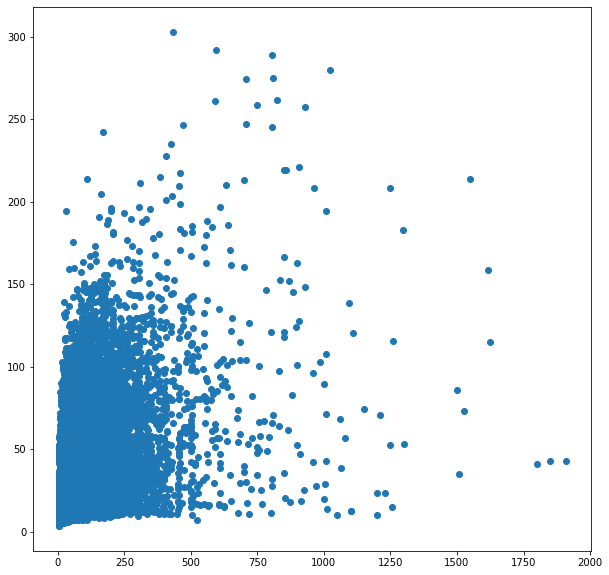

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=ypredict)